## Seasonal Statistics

Let's compute some statistics for our datasets.  We can display the mean, mean +- 1std, median, maximum, minimum. Let's begin by loading the necessary data.

In [1]:
import xarray as xarr
import numpy as nump
import matplotlib.pyplot as plot

dataFile = "./data/clipped_hourly_pressure_1988.nc"
data = xarr.open_dataset(dataFile)

# convert kelvin to celsius
data["t_celsius"] = data["t"] - 273.15

Per their [documentation](https://xarray.dev/blog/season-grouping), xarray supports grouping and selecting by season. Thus, let"s begin by adding a seasonal coordinate to our data, and then calculating the statistics by grouping by season.

In [2]:
seasonal_data  = data.assign_coords(season=data["valid_time"].dt.season)

# returns data array with four objects
seasonal_means = seasonal_data["t_celsius"].groupby("season").mean(...) # need to collapse other dimensions to ensure we're not calculating mean across every lat and lon
seasonal_stds = seasonal_data["t_celsius"].groupby("season").std(...)
seasonal_mins = seasonal_data["t_celsius"].groupby("season").min(...)
seasonal_maxs = seasonal_data["t_celsius"].groupby("season").max(...)
seasonal_medians = seasonal_data["t_celsius"].groupby("season").median(...)

# to confirm it outputs a 1d array
print(seasonal_maxs)

<xarray.DataArray 't_celsius' (season: 4)> Size: 16B
array([20.25534  ,  7.558258 ,  6.2325745,  1.1439514], dtype=float32)
Coordinates:
    number   int64 8B ...
  * season   (season) object 32B 'DJF' 'JJA' 'MAM' 'SON'


Now, we can proceed to formatting a table to display our data. Let's first begin by defining the seasonal labels and building our data as a 2d list according to instructions in the [pyplot documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.table.html).

In [3]:
# create our labels  
seasons = ["DJF", "MAM", "JJA", "SON"] # xarray season labels
season_labels = ["Winter", "Spring", "Summer", "Fall"]

# Build the table data as a 2D list
table_data = []
for i, season in enumerate(seasons):
    row = [
        season_labels[i],
        f"{seasonal_means.sel(season=season).values:.2f}",
        f"{seasonal_medians.sel(season=season).values:.2f}",
        f"{seasonal_stds.sel(season=season).values:.2f}",
        f"{seasonal_mins.sel(season=season).values:.2f}",
        f"{seasonal_maxs.sel(season=season).values:.2f}"
    ]
    table_data.append(row)

Now, we can construct and show our figure.

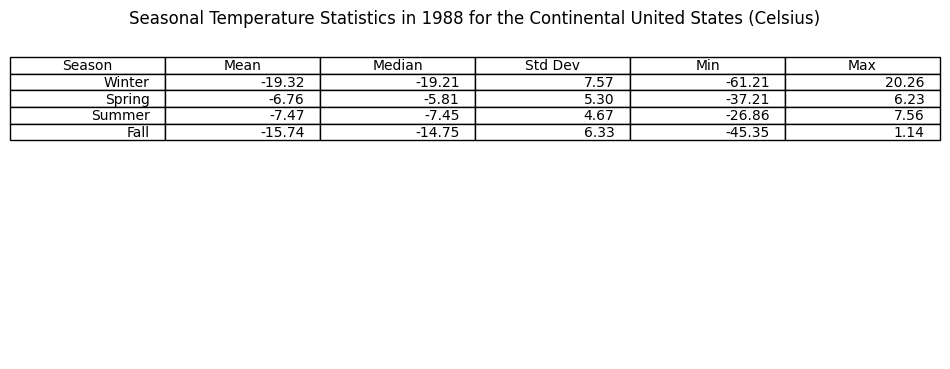

In [4]:
figure = plot.subplots(figsize=(12, 4))

table = plot.table(cellText=table_data,
                  colLabels=["Season", "Mean", "Median", "Std Dev", "Min", "Max"], loc="upper center")

plot.title("Seasonal Temperature Statistics in 1988 for the Continental United States (Celsius)", pad=20)
plot.axis("off")
plot.savefig("./plots/Seasonal_Temperature_Hourly_Statistics_1988")
plot.show()

Let's use the same method to calculate the statistics for CLWC.

In [7]:
# returns data array with four objects
seasonal_means_clwc = seasonal_data["clwc"].groupby("season").mean(...) # need to collapse other dimensions to ensure we're not calculating mean across every lat and lon
seasonal_stds_clwc = seasonal_data["clwc"].groupby("season").std(...)
seasonal_mins_clwc = seasonal_data["clwc"].groupby("season").min(...)
seasonal_maxs_clwc = seasonal_data["clwc"].groupby("season").max(...)
seasonal_medians_clwc = seasonal_data["clwc"].groupby("season").median(...)


# Build the table data as a 2D list
table_data = []
for i, season in enumerate(seasons):
    row = [
        season_labels[i],
        f"{seasonal_means_clwc.sel(season=season).values:.20e}",
        f"{seasonal_medians_clwc.sel(season=season).values:.20e}",
        f"{seasonal_stds_clwc.sel(season=season).values:.20e}",
        f"{seasonal_mins_clwc.sel(season=season).values:.20e}",
        f"{seasonal_maxs_clwc.sel(season=season).values:.20e}"
    ]
    table_data.append(row)

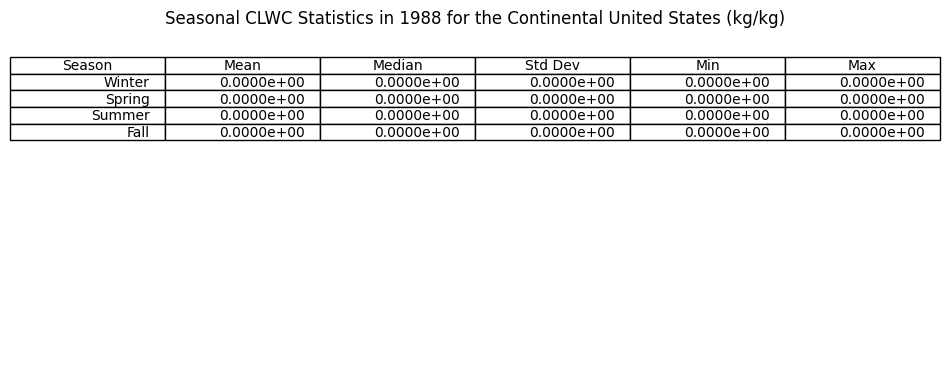

In [6]:
figure = plot.subplots(figsize=(12, 4))

table = plot.table(cellText=table_data, colLabels=["Season", "Mean", "Median", "Std Dev", "Min", "Max"], loc="upper center")

plot.title("Seasonal CLWC Statistics in 1988 for the Continental United States (kg/kg)", pad=20)
plot.axis("off")
plot.savefig("./plots/Seasonal_CLWC_Hourly_Statistics_1988")
plot.show()